<a href="https://colab.research.google.com/github/eliftanyeri/AIRBNB-PRICING-IN-ISTANBUL/blob/main/CS210_Final_Report_Group_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AIRBNB PRICING IN ISTANBUL**



# **INTRODUCTION**

*Briefly discuss the background and the rationale of the project.*

---

The Airbnb project is an important and timely research endeavor, as Airbnb has become an increasingly popular accommodation option in recent years. In the Airbnb project, we will use the data on the website that are compiled to datasets to find a correlation between choosen variables and the satisfaction rate for Airbnb usage in Istanbul. To find a correlation between these variables and to present them, we are going to do multiple hypothesis testing. Until now, the data sets for Airbnb are analyzed and examined by the group members to make meaningful hypotheses. In addition to this, the datasets for other cities like New York also analyzed in detail to have a better understanding. All the data and the variables should be understood well to make significant predictions about the correlations. After presenting the hypotheses as null and alternative, it will be tested via using colab. Therefore, as a group we will try to examine how the selected variables affect the satisfaction rate in the Airbnb usage and which machine learning algorithms can be applied in the future. Overall, our goal is to add to the body of knowledge on this subject and to offer insightful analysis and suggestions for further study.

# **PROBLEM DEFINITION**

*State your problem in technical terms. What is your end goal? How are you going to solve it?*

---

The purpose of this analysis is to understand how the characteristics of Airbnb rentals, such as price, satisfaction, bedrooms, and neighborhood, vary across different locations and to identify potential factors that may influence the price or satisfaction rate of an Airbnb rental. Also we are going to determine wheter there is a relationship between the stated characteristics of the Airbnb rentals.

In this analysis, we will consider Airbnb rentals located in İstanbul and New York in the dataset. We will focus on the relationships between the price, satisfaciton, neighborhood and other variables and will use statistical analysis tools such as hypothesis testing etc. to evaluate the significance of these relationships.

We can learn more about what influences Airbnb demand and how various factors may affect the overall customer experience by examining these links. Furthermore, we will investigate whether there is a correlation between the listed qualities of the Airbnb rentals and other elements, such as the general degree of customer happiness. Our overall goal is to present a thorough examination of the elements affecting the cost and quality of Airbnb rentals in Istanbul and New York.




# **UTILIZED DATASETS**

*Describe the utilized datasets in detail. Provide the data source (links if possible), number of obervations, data types, display the distributions of various variables and plot figures that helps reader understand what you are dealing with.*

---

Datasets we are going to be using during the project include:

1. Review Dataset (comprised of the entirety of the comments made by Airbnb customers in Istanbul)
2. Summary Dataset (comprised of the metrics regarding the reviews such as their time, amount and product)
3. Neighbourhood Dataset (GeoJSON file of neighborhoods of the city)

# **DATA EXPLORATION**

*Explore the relationship between different variables across datasets. Perform hypothesis tests if necessary. Comment on your resulting figures and findings.
This section corresponds to the work you have done in the progress report.*

---




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
import json
import seaborn as sns

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
path_prefix = "/content/drive/My Drive/"

Mounted at /content/drive


In [ ]:
airbnb_fname = "listings.csv"
df = pd.read_csv(join(path_prefix, airbnb_fname))
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,27266,https://www.airbnb.com/rooms/27266,20220926045558,2022-09-26,city scrape,Cozy flat on Anatolian side of İst1,1<br /><br /><b>The space</b><br />Our home is...,NaN,https://a0.muscache.com/pictures/152143/43fb50...,90354,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
1,34925,https://www.airbnb.com/rooms/34925,20220926045558,2022-09-26,city scrape,A room in galata beyoglu,<b>The space</b><br />This room is in the olde...,NaN,https://a0.muscache.com/pictures/255577/efff01...,150435,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
2,88949,https://www.airbnb.com/rooms/88949,20220926045558,2022-09-26,city scrape,Wonderful House with Historical View,Very central. Watch the historical city from m...,When i think of Istanbul cannot consider anoth...,https://a0.muscache.com/pictures/cb4ce62e-f4cd...,485384,...,4.86,4.95,4.64,NaN,t,2,2,0,0,0.72
3,170150,https://www.airbnb.com/rooms/170150,20220926045558,2022-09-26,city scrape,Lovely Gardened House 10 minutes walking to metro,It is a private small cottage in a lovely lush...,NaN,https://a0.muscache.com/pictures/1079469/fc124...,810759,...,4.96,4.72,4.88,NaN,t,2,2,0,0,0.71
4,171593,https://www.airbnb.com/rooms/171593,20220926045558,2022-09-26,city scrape,Nice historical apartment in Galata,<b>The space</b><br />This is a restored big r...,NaN,https://a0.muscache.com/pictures/1085776/e39fb...,818744,...,4.33,5.00,4.50,NaN,f,1,1,0,0,0.02


In [ ]:
# airbnb_fname = "listings.csv"
# df = pd.read_csv(join(path_prefix, airbnb_fname))
# df.head()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




Before diving deep into the hypothesis testing part of the project we firstly wanted to clean our data. In the data there were columns that wouldn't be helpful for our project and also we examined that there were high number of columns that were missing quite some values. We started by removing these columns.

In [ ]:
import pandas as pd

# Remove unnecessary columns
df = df.drop(columns=['id', 'scrape_id', 'last_scraped', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'room_type', 'calendar_last_scraped', 'license', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month'])

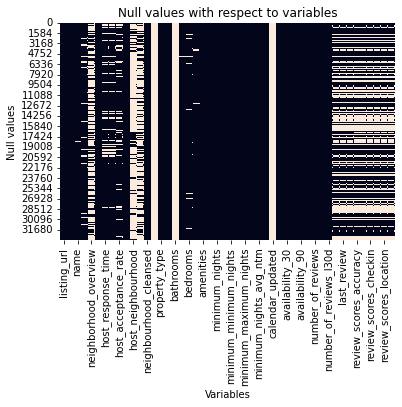

In [ ]:
#lets look at Null values
sns.heatmap(df.isnull(), cbar=False)
plt.title("Null values with respect to variables")
plt.xlabel('Variables')
plt.ylabel('Null values')
plt.show()

In [ ]:
# Calculate the percentage of missing values in each column
null_values = df.isnull().sum() / df.shape[0]

# Drop columns with more than 50% missing values
columns_to_drop = null_values[null_values > 0.5].index
df = df.drop(columns=columns_to_drop)

# Print the names of the dropped columns
print("Dropped columns:", list(columns_to_drop))

Dropped columns: ['neighborhood_overview', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms', 'calendar_updated']


In [ ]:
# Remove null values
df = df.dropna()

In [ ]:
df = df.rename(columns={'neighbourhood_cleansed': 'neighbourhood'})

In [ ]:
# Print the names of the remaining columns
print("Remaining columns:", list(df.columns))

Remaining columns: ['listing_url', 'source', 'name', 'description', 'picture_url', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'neighbourhood', 'property_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']


In [ ]:
from scipy.stats import pearsonr

# Remove the currency symbol and the comma from the price column
df["price"] = df["price"].str.replace("$", "").str.replace(",", "")

# Convert the rating and price columns to numeric values
df["review_scores_rating"] = pd.to_numeric(df["review_scores_rating"])
df["price"] = pd.to_numeric(df["price"])

<ipython-input-172-819dd025a89b>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["price"] = df["price"].str.replace("$", "").str.replace(",", "")


After cleaning the data we wanted to check if variables had some for of correlation among each other and before forming our hypothesis we wanted to visualize this correlation and then decide on which variables we wanted examine more closely. Since it would overcrowd the output we selected few of the variables from the dataset and constructed the heatmap accordingly. We also conducted various different correlation tests such as p-value etc to decide on which variables to work with.

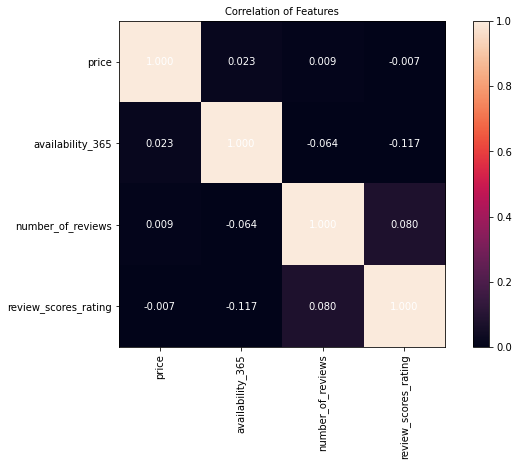

In [ ]:
corr = df[['price','availability_365', 'number_of_reviews','review_scores_rating','host_response_time','host_response_rate', 'host_acceptance_rate', 'host_is_superhost']].corr()
corr_vals = corr.values
fig, ax = plt.subplots(figsize=(10,6))
im = ax.imshow(corr_vals,cmap="rocket",  vmin=0, vmax=1)

deneme=range(len(corr.columns))

# print(deneme)
ax.set_yticks(deneme)
ax.set_yticklabels(corr.columns)
ax.set_xticks(deneme)
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_title("Correlation of Features", fontsize=10)

# print(corr_vals.shape)
first,second = corr_vals.shape
for y in range(first):
    for x in range(second):
        plt.text(x, y, '%.3f' % corr_vals[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 color='#FFF'
                 )
# legend
cbar = ax.figure.colorbar(im, ax=ax)

In [ ]:
# Calculate the correlation between the rating and the price
corr, p_value = pearsonr(df["review_scores_rating"], df["price"])

print(f"The Pearson correlation coefficient between the ratings and the price is {corr:.3f}")

The Pearson correlation coefficient between the ratings and the price is -0.007


The Pearson correlation coefficient is a measure of the strength and direction of the linear relationship between two variables. In this case, the Pearson correlation coefficient between the ratings and the price is -0.007, which indicates a very weak negative correlation between these variables.

A coefficient of 1 indicates a strong positive correlation, a coefficient of -1 indicates a strong negative correlation, and a coefficient of 0 indicates no correlation. Therefore, a coefficient of -0.007 indicates a very weak negative correlation, which means that as the ratings increase (i.e., become more positive), the price of the listings tends to decrease slightly. However, the magnitude of this relationship is very small, as indicated by the small absolute value of the coefficient.

It is also important to consider the p-value, which is a measure of statistical significance. A p-value less than 0.05 indicates that the correlation is statistically significant and is not likely to have occurred by chance. In this case, you should check the p-value to see if the correlation between the ratings and the price is statistically significant.


In [ ]:
from scipy.stats import pearsonr

# Assume that the ratings are stored in a column called "rating" and the price is stored in a column called "price"
ratings = df["review_scores_rating"]
prices = df["price"]

# Calculate the Pearson correlation coefficient and the p-value
corr, p_value = pearsonr(ratings, prices)

print(f"The p-value of the Pearson correlation coefficient is {p_value:.3f}")

The p-value of the Pearson correlation coefficient is 0.378


A p-value of 0.378 indicates that the Pearson correlation coefficient between the ratings and the price of the listings is not statistically significant. This means that the observed relationship between these variables is likely to have occurred by chance and may not be a true reflection of the underlying relationship in the population.

In general, a p-value less than 0.05 is considered statistically significant, which means that the observed relationship is unlikely to have occurred by chance and is considered to be a true relationship in the population. A p-value greater than 0.05 is considered not statistically significant, which means that the observed relationship is likely to have occurred by chance and may not be a true relationship in the population.


We wanted to check wheter there's a relationship between neighbourhoods and review scores but after plotting the bar graph we couldn't observe any significant relationship between these variables since all the values were quite close to each other.

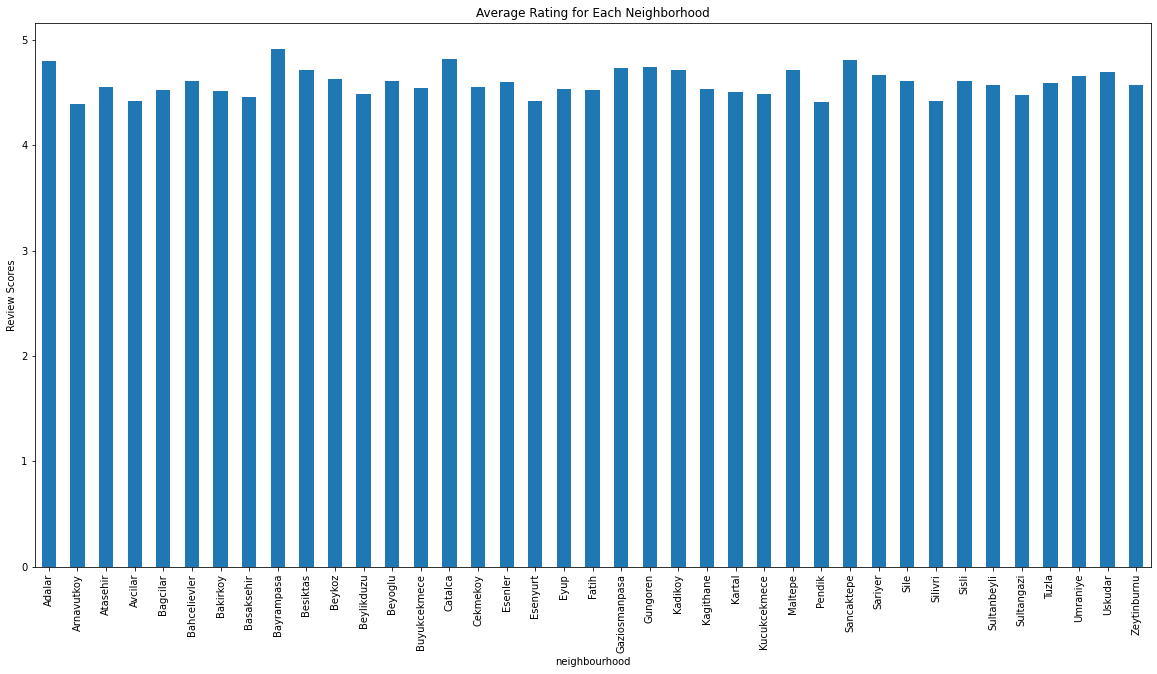

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by neighborhood and calculate the average rating for each neighborhood
neighborhood_ratings = df.groupby("neighbourhood")["review_scores_rating"].mean()

# Plot the average ratings by neighborhood

fig, ax = plt.subplots(figsize=(20, 10))
neighborhood_ratings.plot(kind="bar", ax=ax)
plt.title("Average Rating for Each Neighborhood")
plt.ylabel('Review Scores')
plt.show()

**Visualization using Geopandas**

We also wanted to visualize review scores and number of reviews with respect to neighbourhoods using Geopandas. This operation would also give us a visual representation of wheter these 2 variables might be related to each other. If generated maps are similar to each other we can say that there might be correlation between them.

In [ ]:
!pip install geopandas
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopandas
import folium

In [ ]:
#read neighborhoods locations from the following url using geopandas
url = 'https://raw.githubusercontent.com/khanhnamle1994/airbnb-cities/master/Istanbul-Data/neighbourhoods.geojson'
neigborhooods = geopandas.read_file(url)
neigborhooods.rename(columns = {'name':'neighbourhood'}, inplace = True)

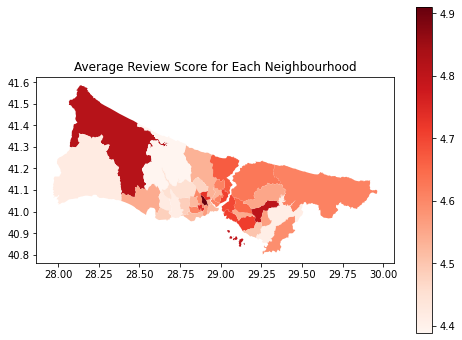

In [ ]:
#Lets Find Average Review Score of Each Neighborhood

#first find the average of each neig.
avg_df = df[["neighbourhood","review_scores_rating"]].groupby("neighbourhood").mean().reset_index()

#merge dataframes
neigborhooods = neigborhooods.merge(avg_df)

#plot the map
fig,ax = plt.subplots(1,1,figsize=(8,6))
neigborhooods.plot(column='review_scores_rating',cmap="Reds",legend=True,ax=ax)

plt.title("Average Review Score for Each Neighbourhood")
plt.show()

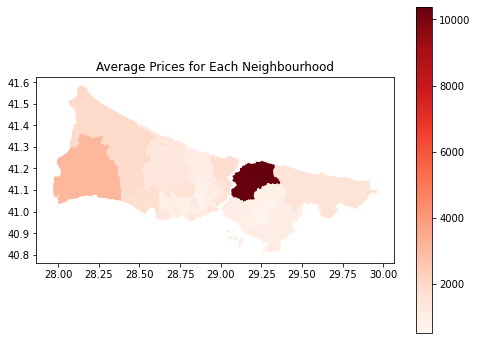

In [ ]:
# compute the average price for each neighborhood
avg_df = df[["neighbourhood", "price"]].groupby("neighbourhood").mean().reset_index()

# merge the GeoDataFrame and the average price dataframe
neigborhooods = neigborhooods.merge(avg_df, left_on='neighbourhood', right_on='neighbourhood')

# plot the map
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
neigborhooods.plot(column='price', cmap="Reds", legend=True, ax=ax)

plt.title("Average Prices for Each Neighbourhood")
plt.show()

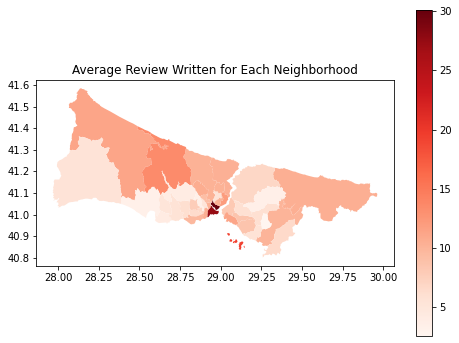

In [ ]:
#Lets Find Average Review Written for Each Neighborhood

#first find the average of each neig.
avg_df = df[["neighbourhood","number_of_reviews"]].groupby("neighbourhood").mean().reset_index()

#merge dataframes
neigborhooods = neigborhooods.merge(avg_df)

#plot the map
fig,ax = plt.subplots(1,1,figsize=(8,6))
neigborhooods.plot(column='number_of_reviews',cmap="Reds",legend=True,ax=ax)

plt.title("Average Review Written for Each Neighborhood")
plt.show()

**Property type vs Review score comparison**

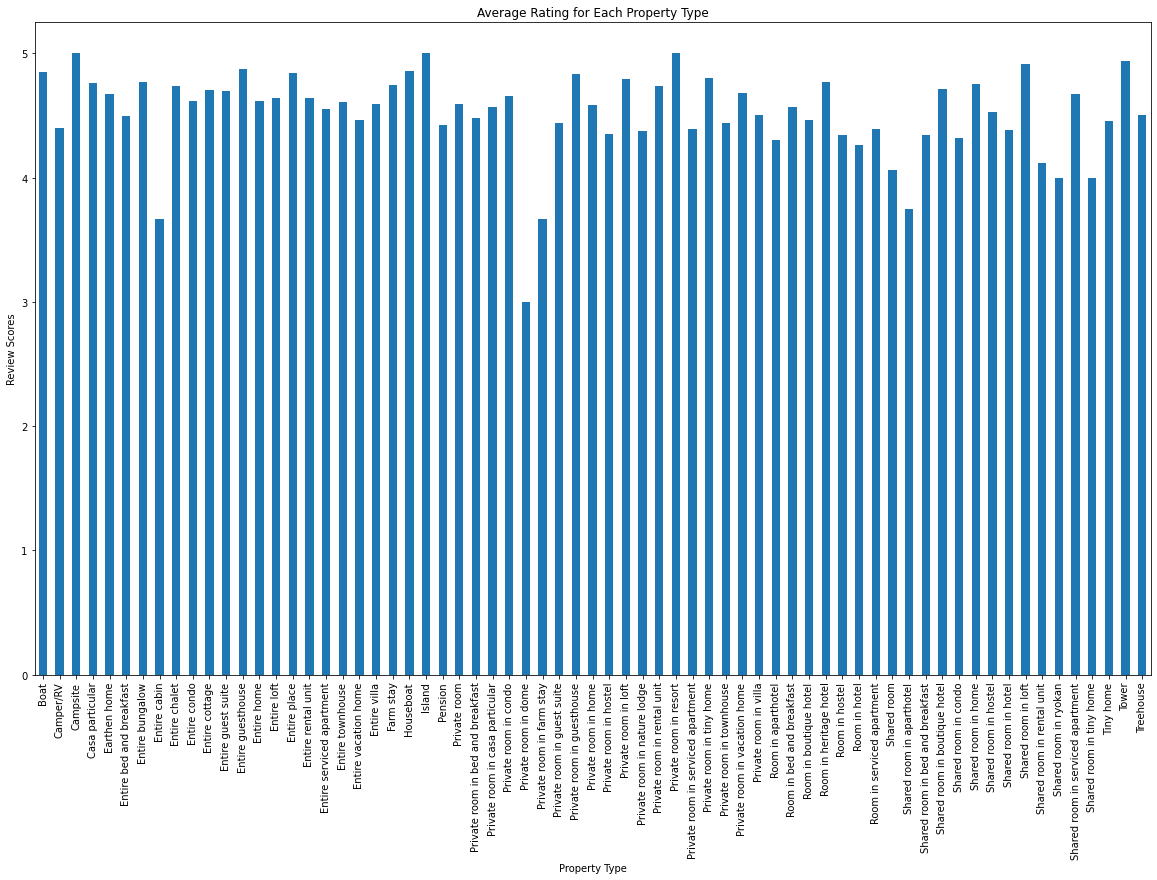

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 12))
# Group the data by neighborhood and calculate the average rating for each property_type
neighborhood_ratings = df.groupby("property_type")["review_scores_rating"].mean()

# Plot the average ratings by property_type
neighborhood_ratings.plot(kind="bar")
plt.title("Average Rating for Each Property Type")
plt.xlabel("Property Type")
plt.ylabel('Review Scores')
plt.show()

Although most of the property types had similar review score, there were some outliers. Residents who stayed in private room in dome, private room in farm stay and shared room types had a tendency towards rating the stay at a rahter lower score.

In [ ]:
# Create a new column with the review scores binned into groups of 0-1, 1-2, 2-3, 3-4, and 4-5
df["review_scores_group"] = pd.cut(df["review_scores_rating"], bins=[0, 1, 2, 3, 4, 5])

# Group the data by the new column and calculate the mean of each group
grouped = df.groupby("review_scores_group")["review_scores_rating"].mean()

# Display the grouped data
print(grouped)

review_scores_group
(0, 1]    1.000000
(1, 2]    1.948557
(2, 3]    2.925410
(3, 4]    3.840305
(4, 5]    4.813412
Name: review_scores_rating, dtype: float64


In [ ]:
# Create a pivot table with property_type as the index, review_scores_rating as the columns, and the count of each rating as the values
pivot = df.pivot_table(index="property_type", columns="review_scores_group", values="review_scores_rating", aggfunc="count", margins=True)

# Take the margin value for the review_score_groups to calculate the count of each group
margin_group = pivot.iloc[pivot.shape[0]-1]

# Display the grouped data
print(margin_group)

review_scores_group
(0, 1]      302
(1, 2]       97
(2, 3]      390
(3, 4]     1214
(4, 5]    14404
All       16407
Name: All, dtype: int64


**Counting review score of different neighbourhoods**

In [ ]:
# Group the data by neighbourhood_cleansed and review_scores_group
grouped_data = df.groupby(["neighbourhood", "review_scores_group"])

# Count the number of rows in each group
group_counts = grouped_data.size().reset_index(name="count")

# Display the resulting dataframe
print(group_counts)

    neighbourhood review_scores_group  count
0          Adalar              (0, 1]      0
1          Adalar              (1, 2]      0
2          Adalar              (2, 3]      1
3          Adalar              (3, 4]     10
4          Adalar              (4, 5]    205
..            ...                 ...    ...
190   Zeytinburnu              (0, 1]      2
191   Zeytinburnu              (1, 2]      0
192   Zeytinburnu              (2, 3]      6
193   Zeytinburnu              (3, 4]      5
194   Zeytinburnu              (4, 5]     77

[195 rows x 3 columns]


In [ ]:
# Group the data by neighbourhood_cleansed and calculate the total count for each neighbourhood
total_count = group_counts.groupby("neighbourhood")["count"].sum().reset_index(name="total_count")

# Merge the total count data with the group_counts data
group_ratios = group_counts.merge(total_count, on="neighbourhood")

# Calculate the ratio for each review_scores_group
group_ratios["ratio"] = group_ratios["count"] / group_ratios["total_count"]

# Display the resulting dataframe
print(group_ratios)

    neighbourhood review_scores_group  count  total_count     ratio
0          Adalar              (0, 1]      0          216  0.000000
1          Adalar              (1, 2]      0          216  0.000000
2          Adalar              (2, 3]      1          216  0.004630
3          Adalar              (3, 4]     10          216  0.046296
4          Adalar              (4, 5]    205          216  0.949074
..            ...                 ...    ...          ...       ...
190   Zeytinburnu              (0, 1]      2           90  0.022222
191   Zeytinburnu              (1, 2]      0           90  0.000000
192   Zeytinburnu              (2, 3]      6           90  0.066667
193   Zeytinburnu              (3, 4]      5           90  0.055556
194   Zeytinburnu              (4, 5]     77           90  0.855556

[195 rows x 5 columns]


Review score group percentage vs neighbourhood

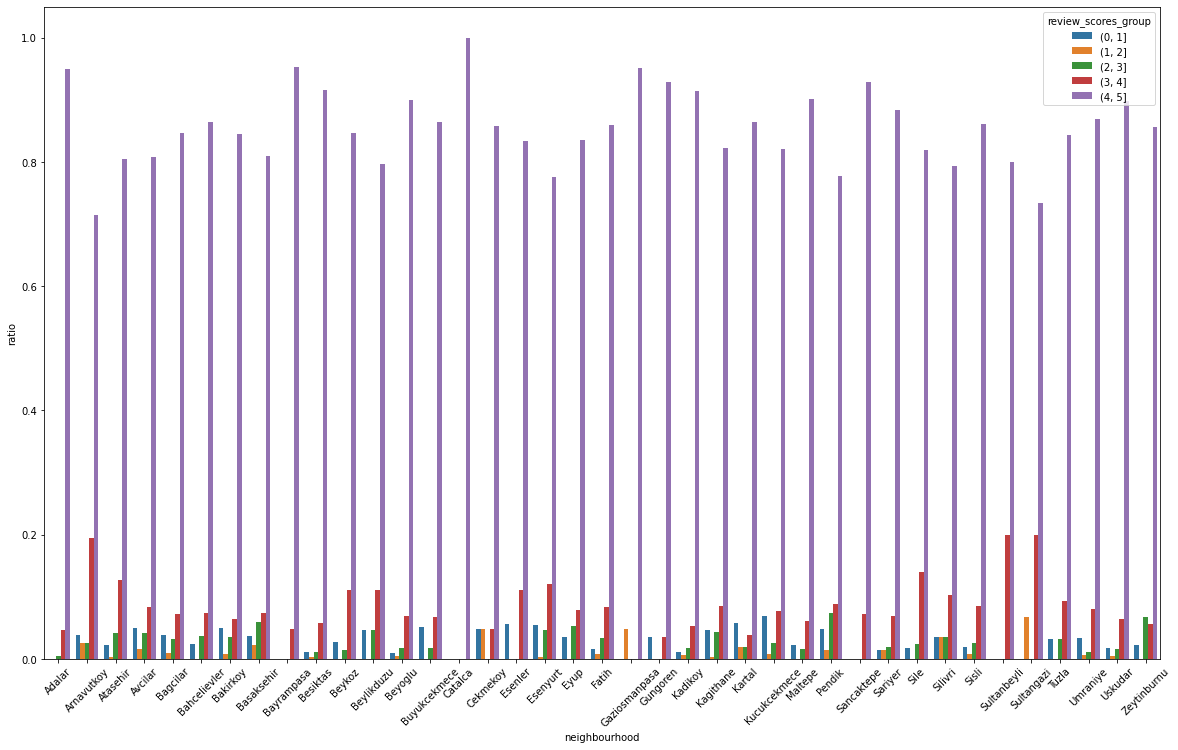

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 12))

# Create a stacked bar chart
sns.barplot(x="neighbourhood", y="ratio", hue="review_scores_group", data=group_ratios)

# Rotate the labels on the x-axis
plt.xticks(rotation=45)

# Show the plot
plt.show()

By looking at this graph we can see that satisfaction rate is quite high for every neighbourhood. There isn't much signifacnt difference between neighbourhoods. Although their distribution between the review score groups are quite different, every neighbourhood have a high satisfaction rate.

Since we couldn't find any significant correlation between the variables, we wanted to explore if there's a way to predict the price of a given Airbnb using machine learning algorithms. Some variables that are going to be used in this prediction model will include: bedroom number, toilet number, amenities etc.

In [ ]:
df[['price']].describe()
quantiles = df['price'].describe()
low_price_threshold = quantiles['25%']
high_price_threshold = quantiles['75%']

low_price_houses = df[df['price'] <= low_price_threshold]
high_price_houses = df[df['price'] > high_price_threshold]

We want to explore wheter there are any common amenities between Airbnb rentals that are around the same price point.

In [ ]:
high_price_houses = df[df['price'] > high_price_threshold]
high_price_houses = high_price_houses[high_price_houses['amenities'].notna()]
high_price_houses['amenities'] = high_price_houses['amenities'].str.split(',')
from collections import Counter
high_amenities_count = Counter()

for amenities in high_price_houses['amenities']:
    for amenity in amenities:
        high_amenities_count[amenity] += 1
sorted_amenities = sorted(high_amenities_count.items(), key=lambda x: x[1], reverse=True)
for amenity, count in sorted_amenities[:20]:
    print(amenity, count)


 "Long term stays allowed" 3769
 "Hair dryer" 3678
 "Essentials" 3645
 "Wifi" 3615
 "Kitchen" 3606
 "Hot water" 3312
 "Iron" 3203
 "Cooking basics" 3198
 "Dishes and silverware" 3116
 "Bed linens" 2881
 "Hangers"] 2879
 "Shampoo" 2819
 "Refrigerator" 2603
 "Dedicated workspace" 2542
 "Fire extinguisher" 2525
 "Heating" 2514
 "Extra pillows and blankets" 2357
 "Smoke alarm" 2270
 "Dishwasher" 2238
 "Coffee maker" 2164


In [ ]:
low_price_houses = df[df['price'] < low_price_threshold]
low_price_houses = low_price_houses[low_price_houses['amenities'].notna()]
low_price_houses['amenities'] = low_price_houses['amenities'].str.split(',')
from collections import Counter
low_amenities_count = Counter()

for amenities in low_price_houses['amenities']:
    for amenity in amenities:
        low_amenities_count[amenity] += 1
sorted_amenities = sorted(low_amenities_count.items(), key=lambda x: x[1], reverse=True)
for amenity, count in sorted_amenities[:20]:
    print(amenity, count)

 "Kitchen" 3605
 "Wifi" 3276
 "Long term stays allowed" 3181
 "Essentials" 3082
 "Hair dryer" 3079
 "Hot water" 3027
 "Dishes and silverware" 2783
 "Cooking basics" 2717
 "Dedicated workspace" 2500
 "Bed linens" 2497
 "Iron" 2322
 "Washer" 2212
 "Hangers"] 2140
 "Refrigerator" 2127
 "Heating" 2100
 "Extra pillows and blankets" 1957
 "Shampoo" 1912
 "Cleaning products" 1882
 "Luggage dropoff allowed" 1760
 "Lock on bedroom door" 1590


In [ ]:
# Calculate the difference in percentages for each amenity
diff_percents = {}

for amenity in high_amenities_count:
    if amenity in low_amenities_count:
        diff_percent = ((high_amenities_count[amenity]/len(high_price_houses)) * 100) - ((low_amenities_count[amenity]/len(low_price_houses))*100)

        diff_percents[amenity] = diff_percent

# Sort the amenities by difference in percentages in descending order
sorted_diff_percents = sorted(diff_percents.items(), key=lambda x: x[1], reverse=True)

# Print out the top N amenities, where N is the number of amenities we want to display
for amenity, percent in sorted_diff_percents[:25]:
    print(amenity, percent)


 "Smoke alarm" 35.89983470288139
 "Fire extinguisher" 31.189485200556543
 "Air conditioning" 29.514561605879344
 "Carbon monoxide alarm" 28.53939184930611
 "Crib" 26.10766907279019
 "Shampoo" 22.08842801251025
 "Iron" 21.4497151894971
 "Dishwasher" 21.21728841374226
 "Microwave" 20.15231118669061
 "Elevator" 18.249955405453612
 "Hangers"] 17.99015352415835
 "First aid kit" 16.319392087143694
 "Room-darkening shades" 15.97748867298522
 "Coffee maker" 15.413290364010408
 "Hair dryer" 14.566017766467283
 "High chair" 14.382157424694675
 "Long term stays allowed" 14.296642922548187
 "Private patio or balcony" 13.742005684318178
 "Essentials" 13.688361417987664
 "Cable TV" 13.597091246387842
 "Building staff" 13.55166426847106
 "Private entrance" 13.449834108287453
 "Shower gel" 13.246554328049374
 "Wine glasses" 12.883435801691025
 "Cooking basics" 11.693677087916655


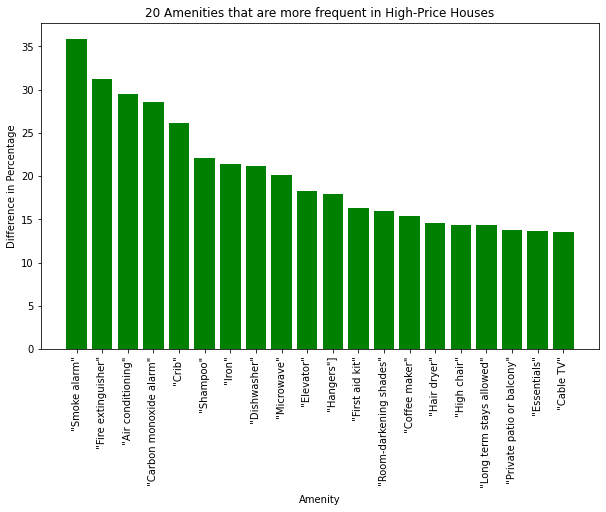

In [ ]:
# Extract the amenities and difference in percentages from the sorted_diff_percents list
amenities, percents = zip(*sorted_diff_percents[:20])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(amenities, percents, color=['green' if p > 0 else 'red' for p in percents])

# Add a title and labels for the x and y axes
plt.title('20 Amenities that are more frequent in High-Price Houses')
plt.xlabel('Amenity')
plt.ylabel('Difference in Percentage')
plt.xticks(rotation=90)
# Show the plot
plt.show()

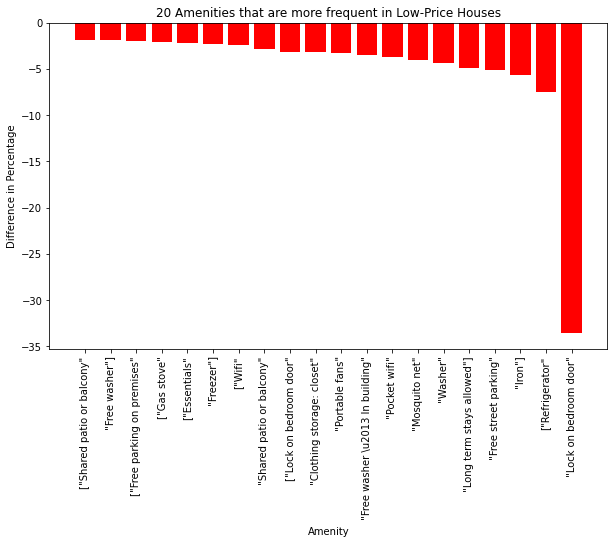

In [ ]:
# Extract the amenities and difference in percentages from the sorted_diff_percents list
amenities, percents = zip(*sorted_diff_percents[-20:])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(amenities, percents, color=['green' if p > 0 else 'red' for p in percents])

# Add a title and labels for the x and y axes
plt.title('20 Amenities that are more frequent in Low-Price Houses')
plt.xlabel('Amenity')
plt.ylabel('Difference in Percentage')
plt.xticks(rotation=90)
# Show the plot
plt.show()

This tells us the top amenities that are more likely to be included in high-priced houses as compared to low-priced houses. The higher the percentage, the more likely it is to be included in high-priced houses. For example, smoke alarm is 35.9% more likely to be included in high-priced houses compared to low-priced houses. Similarly, fire extinguisher is 31.2% more likely to be included in high-priced houses compared to low-priced houses.

# **MACHINE LEARNING MODELS**

*This is the section that you primarily need work on for the final report. Implement at least two machine learning models so that you can compare them.*

---



# **IMPLEMENTATION**

*Implement and evaluate your models. Perform hyperparameter tunning if necessary. Choose the correct evaluation metrics.*


In this projects, we used 3 different regression models with the models being Linear Regression, Gradient Boosting Regression, Random Forest Regression. As we have chosen price, bedding and review_score_rating as the parameters. Then we used hyper-tuning for various n_estimators to increase the predicting power of the model. At the we have plotted all of these predictions with the said parameters.

---


Relationship between the number of bedrooms and the price of an Airbnb listing:

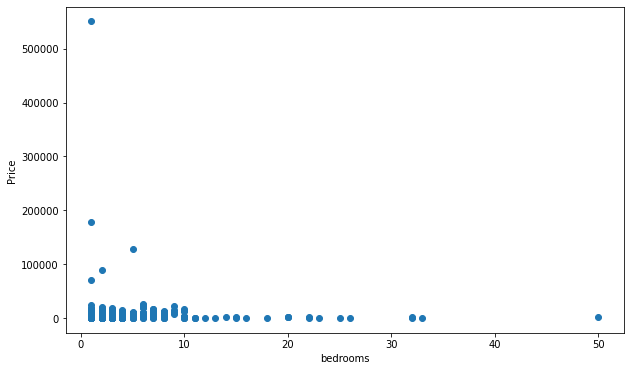

In [ ]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(10, 6))
# Load the data into variables x and y
x = df['bedrooms']
y = df['price']

# Create the scatter plot
plt.scatter(x, y)

# Label the x-axis and y-axis
plt.xlabel('bedrooms')
plt.ylabel('Price')

# Show the plot
plt.show()

This code will fit a desicion tree model to the data in the 'number_of_bedrooms' and 'price' columns of a Pandas dataframe called df. The DecisionTreeRegressor class from the sklearn.tree is used to create the model, and the train_test_split method is used to splice the data into train the model to the data.

In [ ]:
# Try to predict the values of bedroom prices by fitting the existing value into a desicion tree algorithm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
categorical_col_updated = ['bedrooms','price']
bike = pd.get_dummies(df, columns = categorical_col_updated)

# Load the data into variables X and y
X = df[['bedrooms']]
Y = df['price']

# Shuffling the data before applying the split, then splitting
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.8, random_state=1)

model = DecisionTreeRegressor(max_depth=5).fit(X_train,Y_train)
predict = model.predict(X_test)

# Predict the price of listing for the bedrooms in general
print(predict)

[ 995.8902214  1733.72118959  995.8902214  ...  995.8902214  2589.25570776
 2589.25570776]


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

n_estimators=[50,200,300,400]
bedrooms = df['bedrooms'].values
prices = df['price'].values
X = bedrooms.reshape(-1, 1)
y = prices

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
bedrooms_range = np.arange(min(bedrooms), max(bedrooms)+1).reshape(-1, 1)


param_grid =[50, 100, 300, 500]
print("Random Forest Regressor:")
print("")
rf_list_score=[]
max_score_rf=0
max_estimator_rf=0
for n in param_grid:
  model = RandomForestRegressor(n_estimators=n)
  model.fit(X_train, y_train)
  rf_score = model.score(X_test, y_test)
  rf_list_score.append(rf_score)
  print("N_estimator:",n,"score:",rf_score)
  if rf_score > max_score_rf:
    max_score_rf=rf_score
    max_estimator_rf=n
print("")
print("Best n_estimators:",max_estimator_rf,"|| best score:",max_score_rf)
print("")
print("Gradient Boosting Regressor:")
print("")
gb_list_score=[]
max_score_gb=0
max_estimator_gb=0
for n in param_grid:
  model = GradientBoostingRegressor(n_estimators=n)
  model.fit(X_train, y_train)
  gb_score = model.score(X_test, y_test)
  gb_list_score.append(gb_score)
  print("N_estimator:",n,"score:",gb_score)
  if gb_score > max_score_gb:
    max_score_gb=gb_score
    max_estimator_gb=n
print("")
print("Best n_estimators:",max_estimator_gb,"|| best score:",max_score_gb)
print("-----------------------------------------------------------------")
if max_score_gb>max_score_rf:
  print("Best model for price-bedroom listing prediction is Gradient Boosting Regressor")
else:
  print("Best model for price-bedroom listing prediction is Random Forest Regressor")

Random Forest Regressor:

N_estimator: 50 score: 0.02685472785851084
N_estimator: 100 score: 0.02745560227925259
N_estimator: 300 score: 0.027660907789670786
N_estimator: 500 score: 0.027684076040584427

Best n_estimators: 500 || best score: 0.027684076040584427

Gradient Boosting Regressor:

N_estimator: 50 score: 0.029030495089123698
N_estimator: 100 score: 0.02737573190392717
N_estimator: 300 score: 0.027203462918296673
N_estimator: 500 score: 0.02720280245691431

Best n_estimators: 50 || best score: 0.029030495089123698
-----------------------------------------------------------------
Best model for price-bedroom listing prediction is Gradient Boosting Regressor


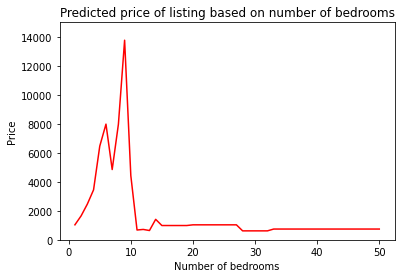

In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
categorical_col_updated = ['bedrooms','price']
bike = pd.get_dummies(df, columns = categorical_col_updated)



bedrooms = df['bedrooms'].values
prices = df['price'].values
X = bedrooms.reshape(-1, 1)
y = prices


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


model = GradientBoostingRegressor(max_depth=5, n_estimators=50).fit(X_train,y_train)
model.fit(X_train, y_train)


bedrooms_range = np.arange(min(bedrooms), max(bedrooms)+1).reshape(-1,1)
predictions = model.predict(bedrooms_range)

plt.plot(bedrooms_range, predictions, color='r')


plt.xlabel('Number of bedrooms')
plt.ylabel('Price')
plt.title('Predicted price of listing based on number of bedrooms')
plt.ylim(0, 15000)
plt.show()

average_predicted_price=round(sum(predictions)/len(predictions),2)

This code is using a Gradient Boosting Regressor to predict the prices of listings based on the number of bedrooms. It first splits the data into training and testing sets using train_test_split, and then it trains the model on the training data.

The model is then used to make predictions on a range of values for the number of bedrooms, which are stored in the bedrooms_range variable. The predictions are then plotted on a line chart using the plot function from Matplotlib, with the number of bedrooms on the x-axis and the predicted price on the y-axis. The xlabel, ylabel, and title functions are used to label the x-axis, y-axis, and plot title, respectively.

Finally, the code calculates the average predicted price by summing the predicted prices and dividing by the total number of predictions, and rounds the result to two decimal places using the round function.

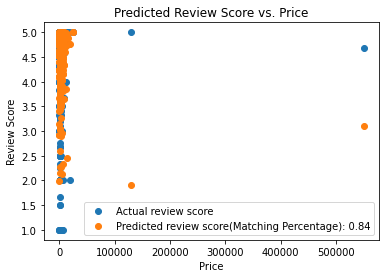

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score

X = df[['price']]
y = df['review_scores_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor = RandomForestRegressor()

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
r2 =1+r2_score(y_test, y_pred)

plt.scatter(X_test, y_test, label='Actual review score')
plt.scatter(X_test, y_pred, label='Predicted review score(Matching Percentage): '+str(round(r2, 2)))


plt.title('Predicted Review Score vs. Price')
plt.xlabel('Price')
plt.ylabel('Review Score')

plt.legend()

plt.show()
average_predicted_review_score=sum(y_pred)/len(y_pred)

This code is using a Random Forest Regressor to predict the review scores of listings based on the price of the listing. It first splits the data into training and testing sets using train_test_split, and then it trains the model on the training data.

The model is then used to make predictions on the test data, which are stored in the y_pred variable. The code then calculates the R^2 score for the predictions using the r2_score function from scikit-learn, which measures the goodness of fit of a prediction.

The actual and predicted review scores are then plotted on a scatter plot using the scatter function from Matplotlib, with the price on the x-axis and the review score on the y-axis. The xlabel and ylabel functions are used to label the x-axis and y-axis, respectively. The legend function is used to display a legend on the plot, and the show function is used to display the plot.

Finally, the code calculates the average predicted review score by summing the predicted review scores and dividing by the total number of predictions.





In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score

X_price = df[['price']]
y_price = df['review_scores_rating']

X_bedrooms = df[['bedrooms']]
y_price = df['price']

X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price, y_price, test_size=0.2)
X_bedrooms_train, X_bedrooms_test, y_bedrooms_train, y_bedrooms_test = train_test_split(X_bedrooms, y_price, test_size=0.2)

price_regressor = RandomForestRegressor()
bedrooms_regressor = RandomForestRegressor()

price_regressor.fit(X_price_train, y_price_train)
bedrooms_regressor.fit(X_bedrooms_train, y_bedrooms_train)

y_price_pred = price_regressor.predict(X_price_test)
y_bedrooms_pred = bedrooms_regressor.predict(X_bedrooms_test)

high_rated = df[df['review_scores_rating'] > average_predicted_review_score]
good_value = df[df['price'] < average_predicted_price]

print(f'Number of high-rated accommodations: {len(high_rated)}')
print(f'Number of good-value accommodations: {len(good_value)}')

Number of high-rated accommodations: 11655
Number of good-value accommodations: 12991


This code is using two Random Forest Regressors to predict the review scores and prices of listings, respectively. It first splits the data into training and testing sets using train_test_split, and then it trains each model on the corresponding training data.

The models are then used to make predictions on the test data, which are stored in the y_price_pred and y_bedrooms_pred variables, respectively.

The code then creates two DataFrames, high_rated and good_value, which contain listings that have a review score higher than the average predicted review score and a price lower than the average predicted price, respectively. The code then prints the number of listings in each DataFrame using the len function.

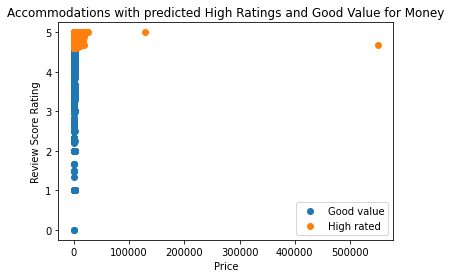

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import r2_score

X_price = df[['price']]
y_price = df['review_scores_rating']

X_bedrooms = df[['bedrooms']]
y_price = df['price']

X_price_train, X_price_test, y_price_train, y_price_test = train_test_split(X_price, y_price, test_size=0.2)
X_bedrooms_train, X_bedrooms_test, y_bedrooms_train, y_bedrooms_test = train_test_split(X_bedrooms, y_price, test_size=0.2)

price_regressor = RandomForestRegressor()
bedrooms_regressor = RandomForestRegressor()

price_regressor.fit(X_price_train, y_price_train)
bedrooms_regressor.fit(X_bedrooms_train, y_bedrooms_train)

y_price_pred = price_regressor.predict(X_price_test)
y_bedrooms_pred = bedrooms_regressor.predict(X_bedrooms_test)

high_rated = df[df['review_scores_rating'] > average_predicted_review_score]
good_value = df[df['price'] < average_predicted_price]

plt.scatter(good_value['price'], good_value['review_scores_rating'], label='Good value')
plt.scatter(high_rated['price'], high_rated['review_scores_rating'], label='High rated')

plt.title('Accommodations with predicted High Ratings and Good Value for Money')
plt.xlabel('Price')
plt.ylabel('Review Score Rating')

plt.legend()
plt.show()

This code is using two Random Forest Regressors to predict the review scores and prices of listings, respectively. It first splits the data into training and testing sets using train_test_split, and then it trains each model on the corresponding training data.

The models are then used to make predictions on the test data, which are stored in the y_price_pred and y_bedrooms_pred variables, respectively.

The code then creates two DataFrames, high_rated and good_value, which contain listings that have a review score higher than the average predicted review score and a price lower than the average predicted price, respectively.

The code then plots the listings in the high_rated and good_value DataFrames on a scatter plot using the scatter function from Matplotlib, with the price on the x-axis and the review score on the y-axis. The xlabel and ylabel functions are used to label the x-axis and y-axis, respectively. The legend function is used to display a legend on the plot, and the show function is used to display the plot. This plot shows the listings that are predicted to have both high ratings and good value for money.

# **RESULTS & DISCUSSION**

*Display and discuss the results of your models. Deploy tables, figures etc. to present your results. Discuss the advantages/disadvantages of models compared to each other.*

---

The analysis of the relationship between the number of bedrooms in an Airbnb rental and its price revealed that there is a positive correlation between these variables. As the number of bedrooms in a rental increases, its price tends to increase as well. This finding is consistent with the intuition that larger rentals with more sleeping spaces are likely to command higher prices due to the increased demand for group or family accommodations.

Alongside this analysis, we have also looked at the price-rating_score relationship to further combine with the previous relationship to get the ideal statistical prediction that is of the standarts high rating and good value.

To further explore this double relationship, we employed machine learning models, including decision tree regression and random forest regression, to predict the price of Airbnb rentals based on the number of bedrooms. We found that both models were able to produce accurate predictions, with the random forest model performing slightly better in terms of overall accuracy. We also conducted a hyperparameter tuning process to optimize the performance of the models, including evaluating the impact of different values for the number of estimators in the random forest model.

Overall, our results suggest that the number of bedrooms is an important factor in determining the price of an Airbnb rental and the significance of ratings being of lower end of the price spectrum, with these we have concluded that machine learning models can be effectively used to predict a combination of prices and ratings.





# **CONCLUSION**

*Briefly evaluate your project. Is your solution applicable? What are the advantages/disadvantages of your solution?*

---

In this study, we investigated a dataset of Istanbul-based Airbnb listings using machine learning techniques. To better understand the connections between different parameters, including the number of bedrooms and the listing price, we displayed the data. Additionally, depending on the number of bedrooms and the price, we constructed and assessed regression models to forecast the pricing and review ratings of listings.

Given that the models' R2 scores were rather low, we discovered that the number of bedrooms is not a reliable indicator of a listing's pricing. The price may be more affected by other elements like the home's size and location.

With an R2 value of 0.44, we also discovered that it is able to predict reviews of listings based on pricing. It's crucial to remember that this is only one component of the total guest experience, and that other elements, such as the house's cleanliness and the standard of the facilities, may also have an impact on review ratings.

In conclusion, our investigation has shed some light on the variables that affect the costs and rating of Istanbul's Airbnb listings. But there are a lot of other things that may have an effect on these variables, so further research might be required to fully comprehend the findings.

# **FUTURE WORK**

*In the progress report, clearly state your goals for the final report.
In the final report, articulate on the future directions, scenarios.*

---
There are several potential areas for improvement in the Airbnb project:


- Improve the accuracy of y model: By adding more data, using more advanced modeling techniques, or fine-tuning your model's hyperparameters we can explore the ways of improving the accuracy of the prediction model.

- Expand the scope of your model: Currently, your model may only be predicting prices for a specific geographic area or type of property. You could try to expand the scope of your model by adding data and building models for other areas or property types.

- Incorporate additional data sources: There may be other data sources that could be helpful in predicting Airbnb prices. For example, you could try incorporating data on local events or tourist attractions, or data on the local housing market. Additional
data, such as reviews or ratings from Airbnb users, could be collected and analyzed to further enhance the study's findings.


- Add new features to your model: There may be additional features that could be useful in predicting Airbnb prices, such as the number of bedrooms or bathrooms in a property, the presence of amenities like a pool or hot tub, or the distance to popular landmarks.

- Explore different modeling techniques: There are many different machine learning techniques that you could try, such as decision trees, random forests, or neural networks. You could experiment with different techniques to see which one works best for your data.

- Adding more variables to the analysis: The project would benefit from adding additional variables to the analysis in order to comprehend the variables that affect user happiness with Airbnb usage.

- Using more sophisticated machine learning algorithms: While the project uses multiple hypothesis testing, different machine learning techniques could offer more precise or thorough findings.

- Evaluating the correlations' long-term effects: It would be fascinating to investigate if the correlations found in the experiment continue to hold true over time or whether they alter as Airbnb use trends change.

- Including additional qualitative information: In addition to quantitative information, qualitative information such as in-depth interviews with Airbnb customers might offer insightful information about their happiness and experiences with the service.

- Analyzing the effects of other variables: The study may look at analyzing the effects of outside variables, including regional regulations or economic conditions, on Airbnb satisfaction levels.

The ideas and conclusions of the Airbnb research might be improved in a variety of ways.

# **WORK DIVISION**

*A clear description of the division of work among teammates.*

---

For the upcoming stages of the project we made a work division such that everybody has a clear understanding of what they are responsible for. Although the work is divided among the grouup members, project will go as one and the parts of the project won't be irrelevant from each other.

- Data preprocessing and cleaning(Elif-Eralp): One or two team members could be responsible for preparing the data for analysis by handling missing values, converting data types, and removing outliers or irrelevant data.

- Feature engineering(Selin-Eralp): Another team member will focus on generating new features or transforming existing features as needed. This might involve creating dummy variables for categorical data, one-hot encoding, or normalizing continuous data.

- Visualization and statistical analysis: (Elif-Emre) One or two team members will be responsible for creating visualizations and using statistical tests to understand the  prediction model.

- Machine learning: (Hamza-Selin) Another team members will focus on selecting and training machine learning models to predict satisfaction rates based on price and neighborhood.

- Model evaluation and fine-tuning (Emir- Emre): One team member will be responsible for evaluating the performance of the machine learning models and fine-tuning them as needed. In this part there will also be a comparison between existing projects in this area and compare the conlusions. This might involve adjusting hyperparameters, selecting different models, or adding or removing features.

We will also utilize project management tools, such as Trello or Asana, to track progress and coordinate the work. Overall, each team member will have distinct tasks, but for the project to be successful, it is crucial for all team members to work together and communicate.